In [9]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, visualize_transition, circuit_drawer
import numpy as np
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, random_statevector
backend = AerSimulator()

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

qiskit_runtime_service.__init__:INFO:2024-04-08 22:31:44,046: Default instance: ibm-q/open/main


Circuito Quântico:
     ┌───────────────────────────────────────────────┐┌────────────┐
q_0: ┤ Initialize(-0.66431-0.27453j,-0.5343-0.4448j) ├┤ Rz(0.5236) ├
     ├───────────────────────────────────────────────┤├────────────┤
q_1: ┤ Initialize(-0.66431-0.27453j,-0.5343-0.4448j) ├┤ Rz(1.0472) ├
     ├───────────────────────────────────────────────┤├────────────┤
q_2: ┤ Initialize(-0.66431-0.27453j,-0.5343-0.4448j) ├┤ Rz(1.5708) ├
     ├───────────────────────────────────────────────┤├────────────┤
q_3: ┤ Initialize(-0.66431-0.27453j,-0.5343-0.4448j) ├┤ Rz(2.0944) ├
     ├───────────────────────────────────────────────┤├───────────┬┘
q_4: ┤ Initialize(-0.66431-0.27453j,-0.5343-0.4448j) ├┤ Rz(2.618) ├─
     ├───────────────────────────────────────────────┤├───────────┴┐
q_5: ┤ Initialize(-0.66431-0.27453j,-0.5343-0.4448j) ├┤ Rz(3.1416) ├
     └───────────────────────────────────────────────┘└────────────┘
Visualização na Esfera de Bloch do estado global:


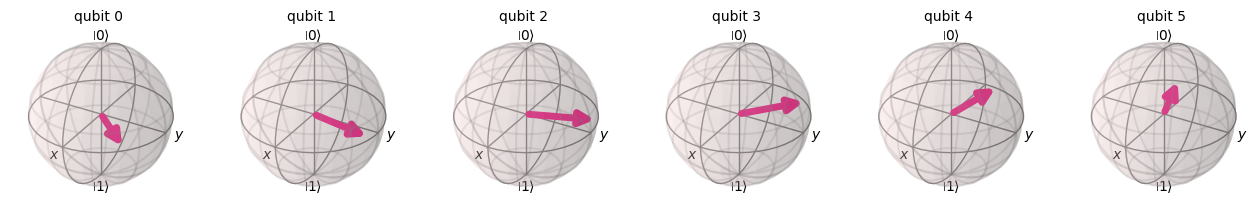

In [24]:
random_state = random_statevector(2)

# Inicializar o circuito com 6 q-bits
qc = QuantumCircuit(6)

# Inicializar todos os q-bits com o estado aleatório sorteado
for qubit in range(6):
    qc.initialize(random_state, qubit)

# Aplicar uma rotação Rz em cada q-bit
for n in range(6):
    angle = (n + 1) * (3.14159 / 6) # n * pi/6
    qc.rz(angle, n)
    
# Mostrar o circuito (opcional)
print("Circuito Quântico:")
print(qc)

qc.save_statevector()
qc.measure_all()
# Simular o circuito para obter o estado final
job = backend.run(qc)
result = job.result()
vetor = result.get_statevector()

# Visualizar na esfera de Bloch
print("Visualização na Esfera de Bloch do estado global:")
plot_bloch_multivector(vetor)
